# Baseline Model

## Table of Contents
1. [Model Choice](#model-choice)
2. [Feature Selection](#feature-selection)
3. [Implementation](#implementation)
4. [Evaluation](#evaluation)


In [1]:
from math import nan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
import scikeras

from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from scikeras.wrappers import KerasRegressor

## Model Choice

We tried a linear regression model and a random forest model because both seemed suitable for our task (predicting the production with 1-2 parameters) In the end we decided on the linear regression model, because it seemed to work best.


## Feature Selection

As features, we selected the average temperature and the Sunshine duration, we know there is a linear relationship between the  solar radiation and the production, bbut the solar radiation is also harder to predict. So we decided to use two different parameters, which should be closely related to the production, which are easier to predict



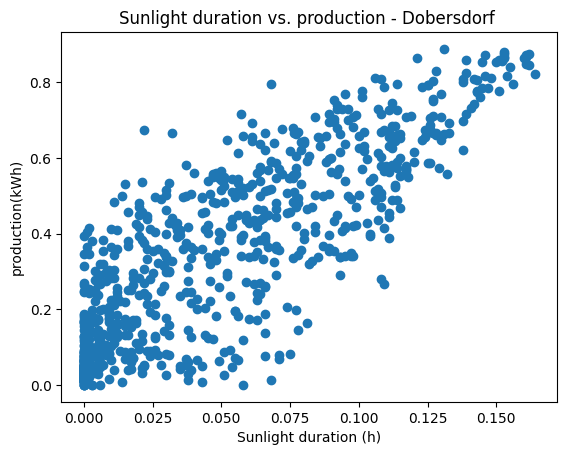

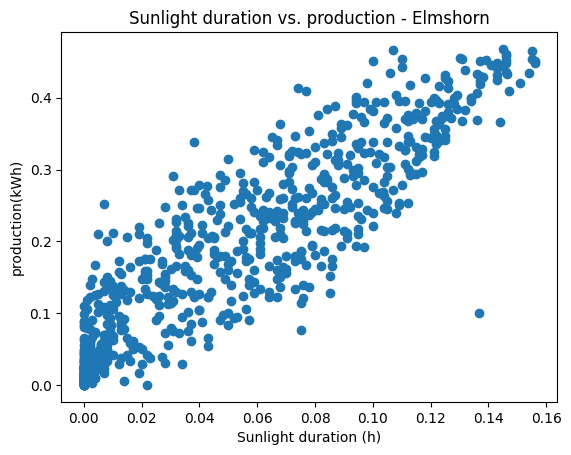

X nan: False
y nan: False
X inf: False
y inf: False


In [2]:
# Load the dataset
# Replace 'your_dataset.csv' with the path to your actual dataset
df = pd.read_csv('../Dobersdorf/Dobersdorf_all_cut.csv', sep=";", decimal=",", header=0)
df_elmshorn = pd.read_csv('../Elmshorn/Elmshorn_all_cut.csv', sep=";", decimal=",", header=0)


# Feature selection
# Example: Selecting only two features for a simple baseline model
X = df[['Sun','Tavg']]
y = df['Produktion(kWH)']
n_y= y/100
n_x= X/100

X1 = df_elmshorn[['Sun','Tavg']]
y1 = df_elmshorn['Power Generation [kWh]']
n_y1= y1/100
n_x1= X1/100


# Splitting the dataset
#X_train, X_test, y_train, y_test = train_test_split(n_x, n_y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(n_x, n_y, test_size=0.2,shuffle=False)

###Dobersdorf
plt.scatter(n_x['Sun'], n_y)
plt.xlabel('Sunlight duration (h)')
plt.ylabel('production(kWh)')
plt.title('Sunlight duration vs. production - Dobersdorf ')
plt.show()

##elmshorn
plt.scatter(n_x1['Sun'], n_y1)
plt.xlabel('Sunlight duration (h)')
plt.ylabel('production(kWh)')
plt.title('Sunlight duration vs. production - Elmshorn')
plt.show()

###here we had to exclude missing values
X_train = np.nan_to_num(X_train, nan=0.0, posinf=0.0, neginf=0.0)

print("X nan:", np.isnan(X_train).any())
print("y nan:", np.isnan(y_train).any())
print("X inf:", np.isinf(X_train).any())
print("y inf:", np.isinf(y_train).any())

In [3]:
print(X_train.shape)
print(y_train.shape)

(673, 2)
(673,)


## Implementation

[Implement your baseline model here.]



In [4]:
model = keras.Sequential([
    keras.Input(shape=(2,)),
    keras.layers.Dense(2),
    keras.layers.Dense(1, activation="relu")
])


# TODO Compile the model
model.compile(
#loss= keras.losses.MeanSquaredError(),
loss= keras.losses.MeanAbsoluteError(),
optimizer= keras.optimizers.Adam(learning_rate=0.001),
metrics=["mae"]
               )

# Train final model on all training data
model.fit(X_train, y_train, batch_size=16, epochs=50) #, validation_split=0.2)

Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 0.2572 - mae: 0.2572
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - loss: 0.2316 - mae: 0.2316
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - loss: 0.2195 - mae: 0.2195
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - loss: 0.2135 - mae: 0.2135
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - loss: 0.2093 - mae: 0.2093
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2062 - mae: 0.2062
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - loss: 0.2037 - mae: 0.2037
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - loss: 0.2013 - mae: 0.2013
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - loss: 0.1985 - mae: 0.1985
Epoch 10/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1955 - mae: 0.1955 
Epoch 11/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - loss: 0.1924 - mae: 0.1924
Epoch 12/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.1889 - mae: 0.1889
Epoch 13/50
43/43 ━━━━━━━━━

In [5]:
# Evaluate the baseline model
model.evaluate(X_train,y_train)

# TODO Make predictions
forecast = model.predict(X_test)
mse = mean_squared_error(y_test, forecast)
print(mse)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0979 - mae: 0.0979 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
0.012065994748053595


New wo cross validation
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0969 - mae: 0.0969 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
0.01168494660734097

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2875 - mae: 0.2875 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
0.240025567765164

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1337 - mae: 0.1337 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
0.034788547555453124